In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/shopping-data.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe(include='all')

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


# 계층적 군집 분석
* 비지도학습
* 데이터가 적을 경우 사용
* 거리 계산 지표: 유클리드, 맨하탄, 코사인유사도
  * 단일연결법(single linkage)-최단연결법: 군집과 군집 사이에서 가장 가까운 데이터를 기준으로 묶음.
  * 완전연결법(complete linkage)-최장연결법: 군집과 군집 사이에서 가장 먼 데이터를 기준은 묶음.
  * 평균연결법(average linkage)- 군집과 군집 사이의 모든 데이터의 평균 데이터로 계산(이상치에 덜 민감하다)
  * 중심연결법(controid linkage)- 군집의 중심점 사이의 거리를 거리로 측정한 방법, 계산이 빠르다.
  * 와드연결법(ward linkage)- 군집내 오차가 최소가 되는 데이터로 계산, 군집내 분산이 최소. 조밀한 군집
* 계층적 군집의 시각화는 덴드로그램으로 한다.

In [5]:
import scipy.cluster.hierarchy as shc

In [6]:
data = pd.get_dummies(data, drop_first=True)
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False
...,...,...,...,...,...
195,196,35,120,79,False
196,197,45,126,28,False
197,198,32,126,74,True
198,199,32,137,18,True


In [7]:
data2 = data.copy()
data2

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False
...,...,...,...,...,...
195,196,35,120,79,False
196,197,45,126,28,False
197,198,32,126,74,True
198,199,32,137,18,True


In [8]:
data = data.drop("CustomerID", axis=1)
data

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
...,...,...,...,...
195,35,120,79,False
196,45,126,28,False
197,32,126,74,True
198,32,137,18,True


In [94]:
# plt.switch_backend('TkAgg')

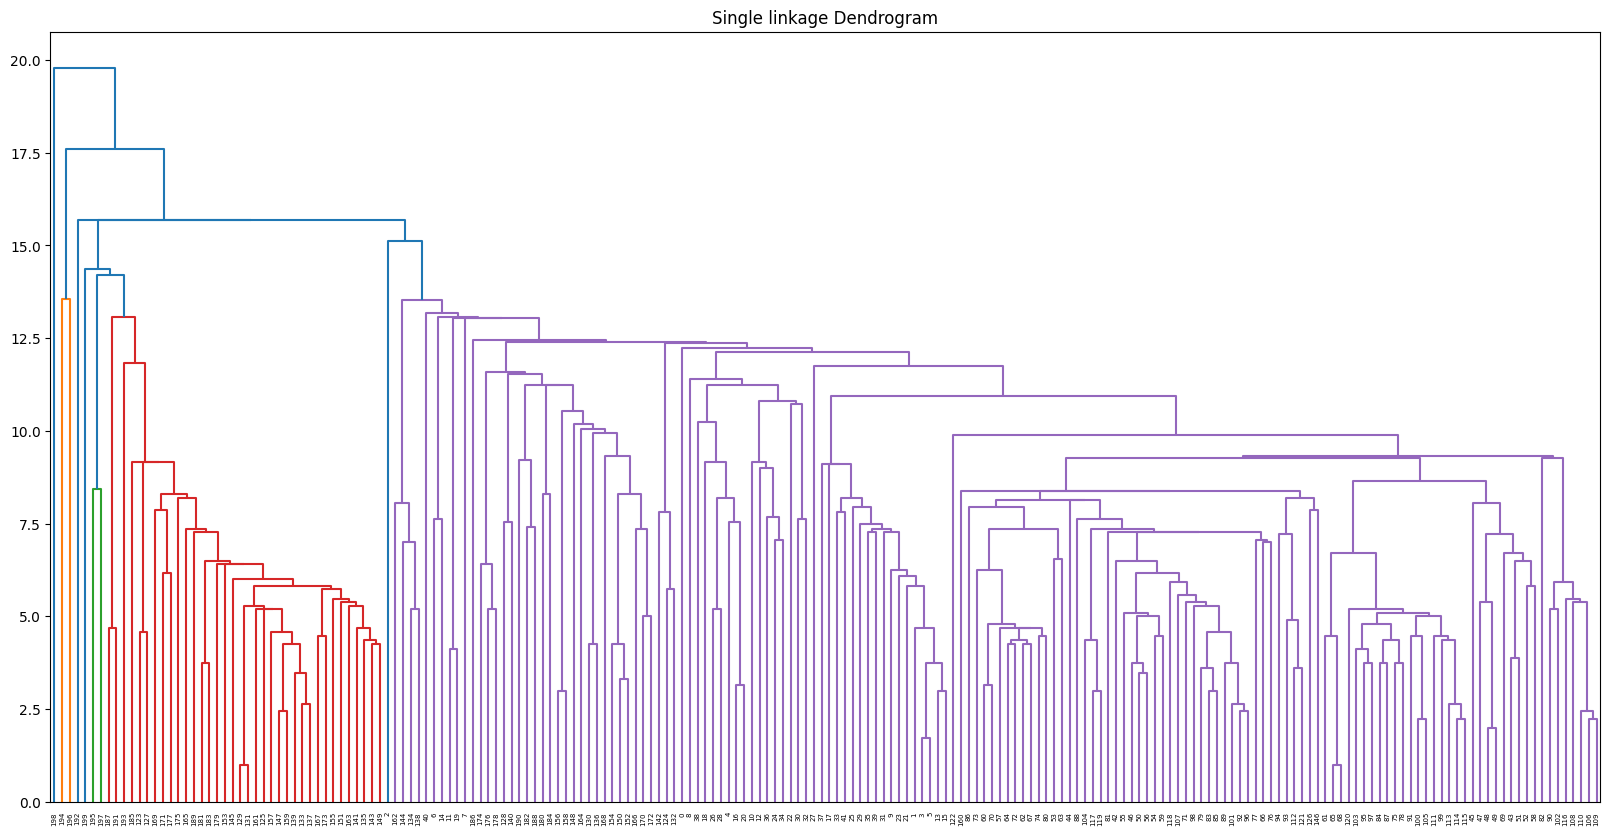

In [9]:
plt.figure(figsize=(20,10))
plt.title("Single linkage Dendrogram")
dend = shc.dendrogram(shc.linkage(data, method='single'))
plt.show()

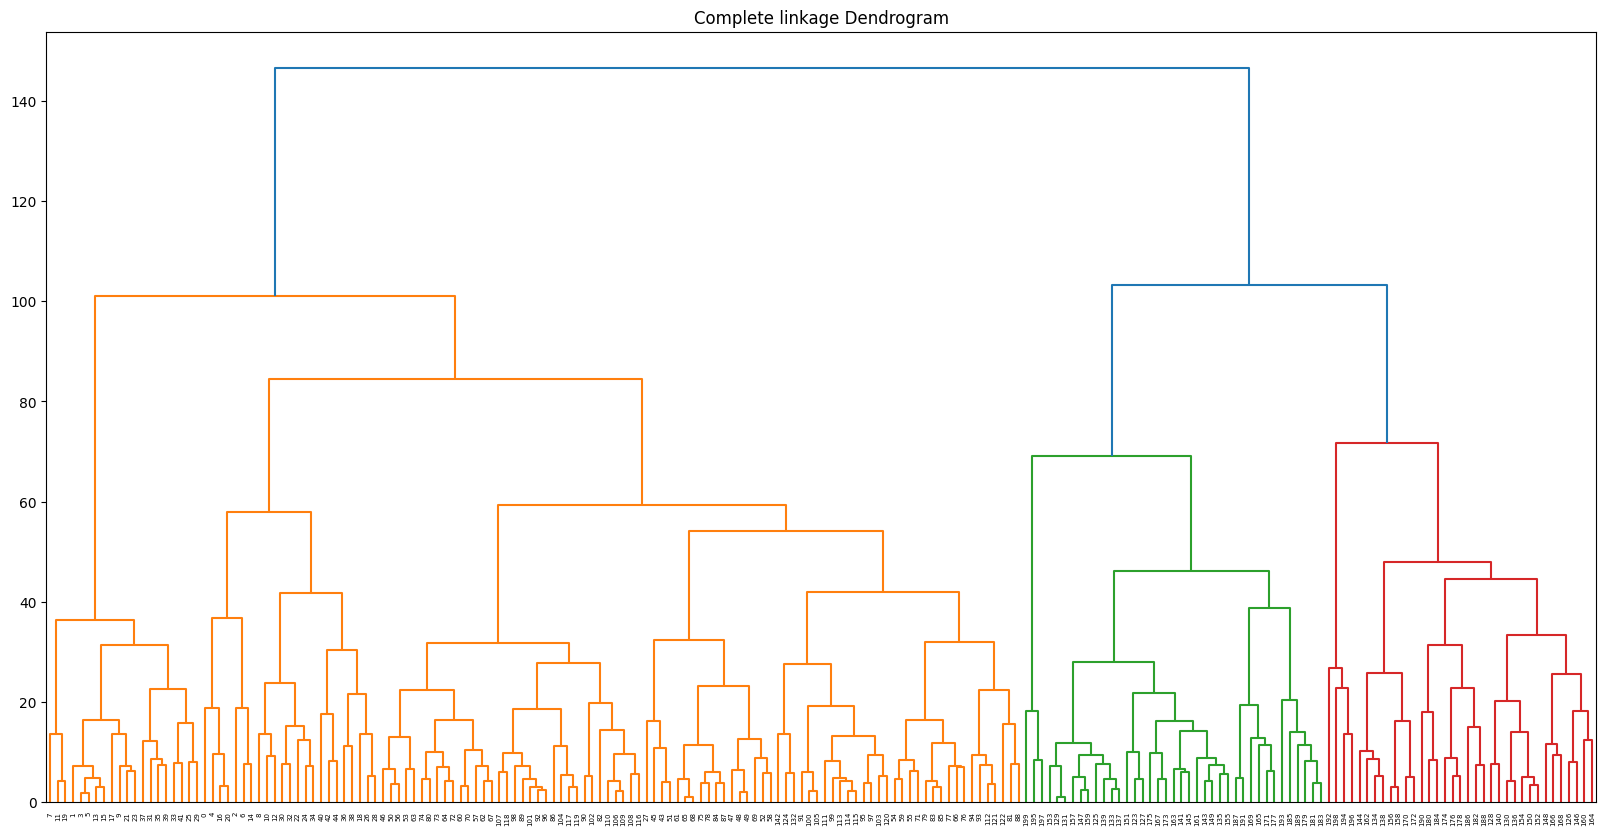

In [10]:
plt.figure(figsize=(20,10))
plt.title("Complete linkage Dendrogram")
dend = shc.dendrogram(shc.linkage(data, method='complete'))
plt.show()

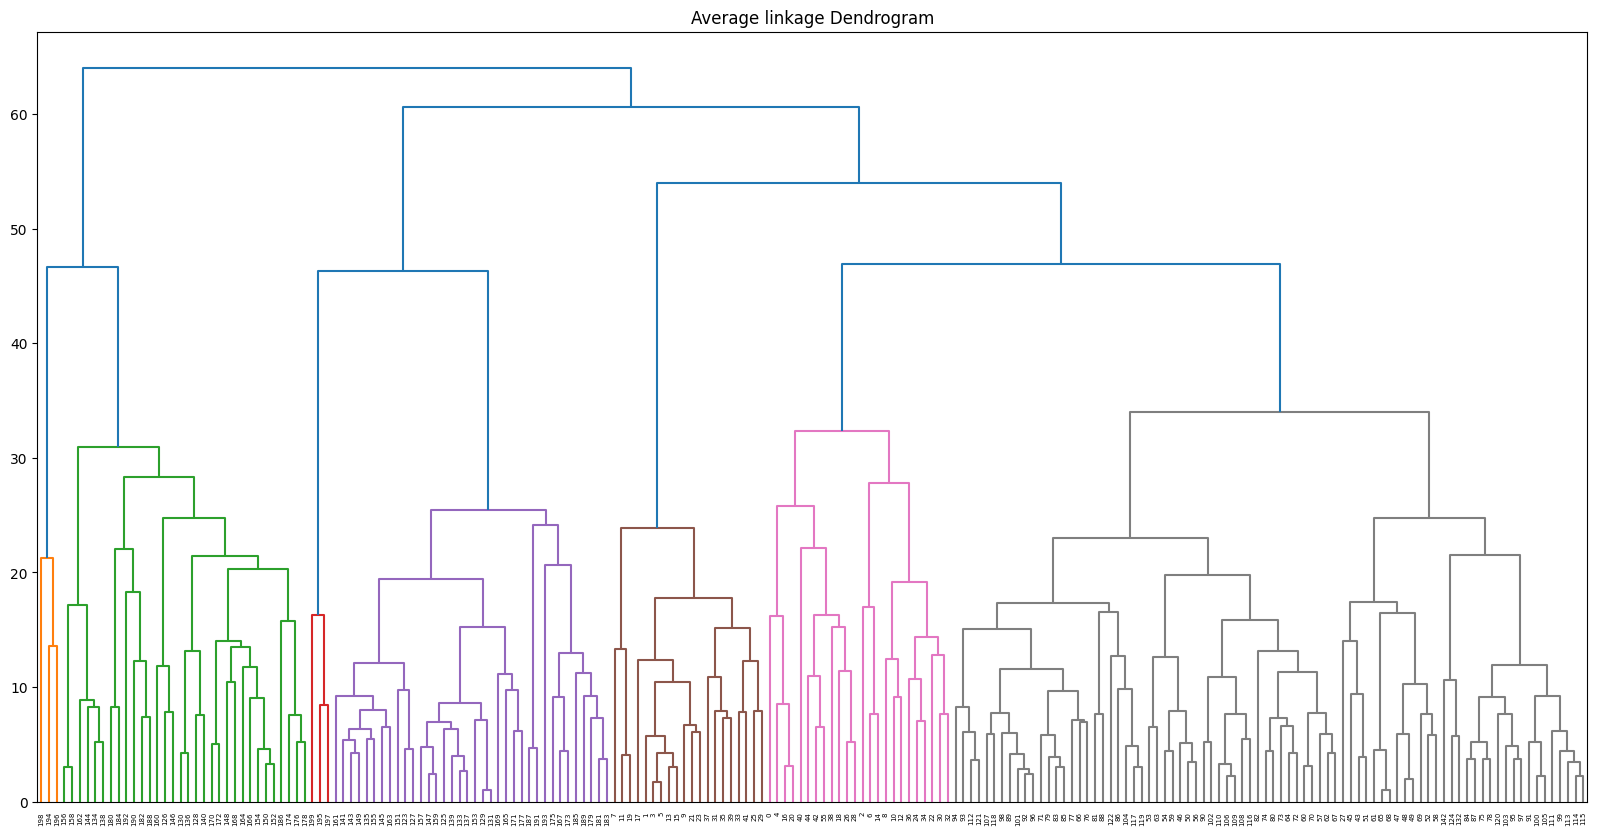

In [11]:
plt.figure(figsize=(20,10))
plt.title("Average linkage Dendrogram")
dend = shc.dendrogram(shc.linkage(data, method='average'))
plt.show()

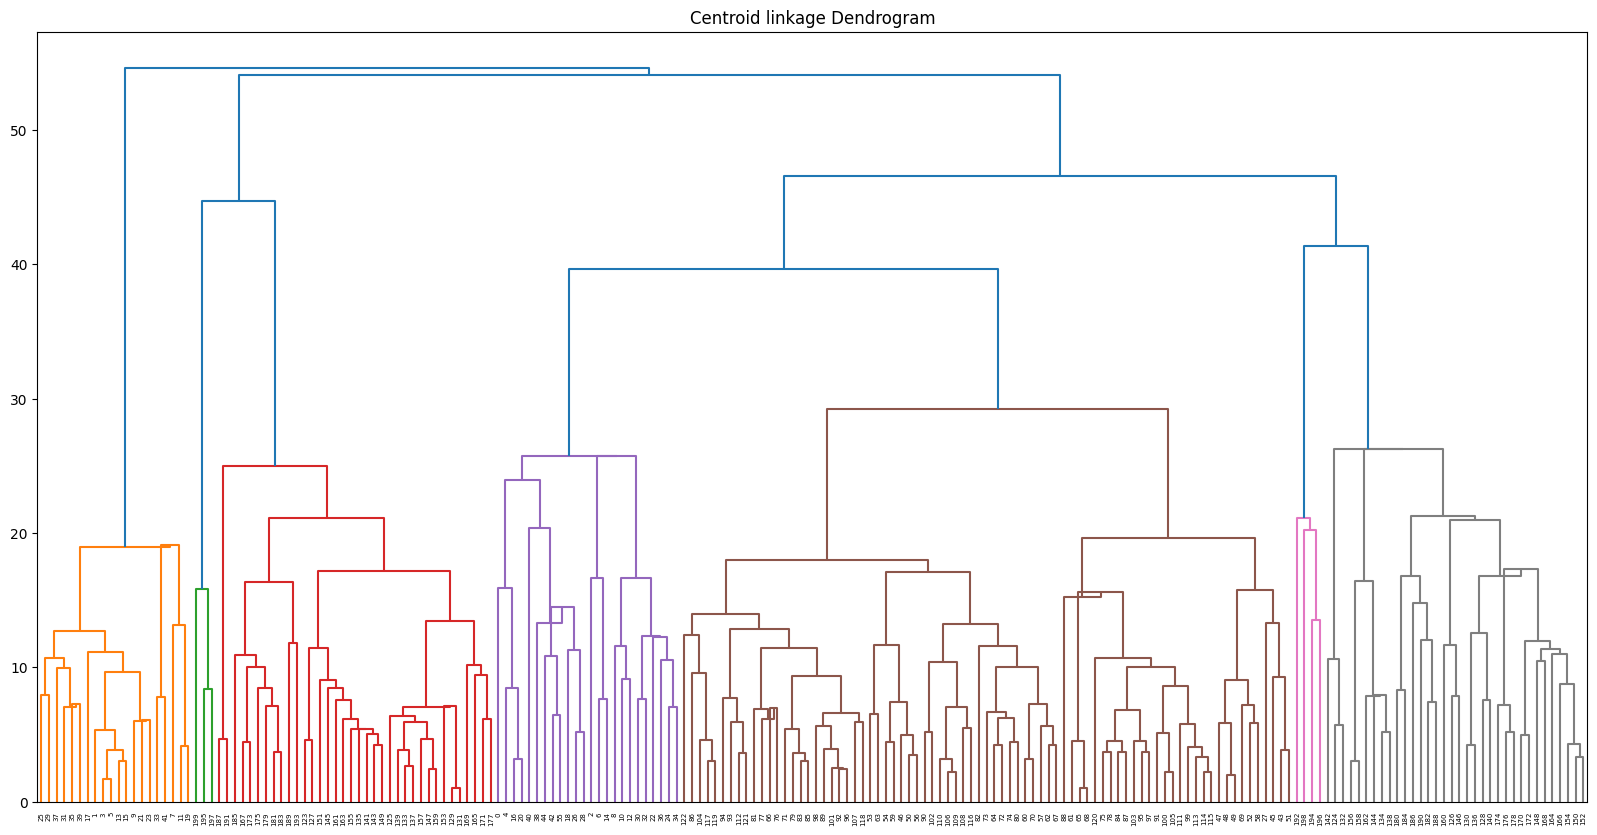

In [12]:
plt.figure(figsize=(20,10))
plt.title("Centroid linkage Dendrogram")
dend = shc.dendrogram(shc.linkage(data, method='centroid'))
plt.show()

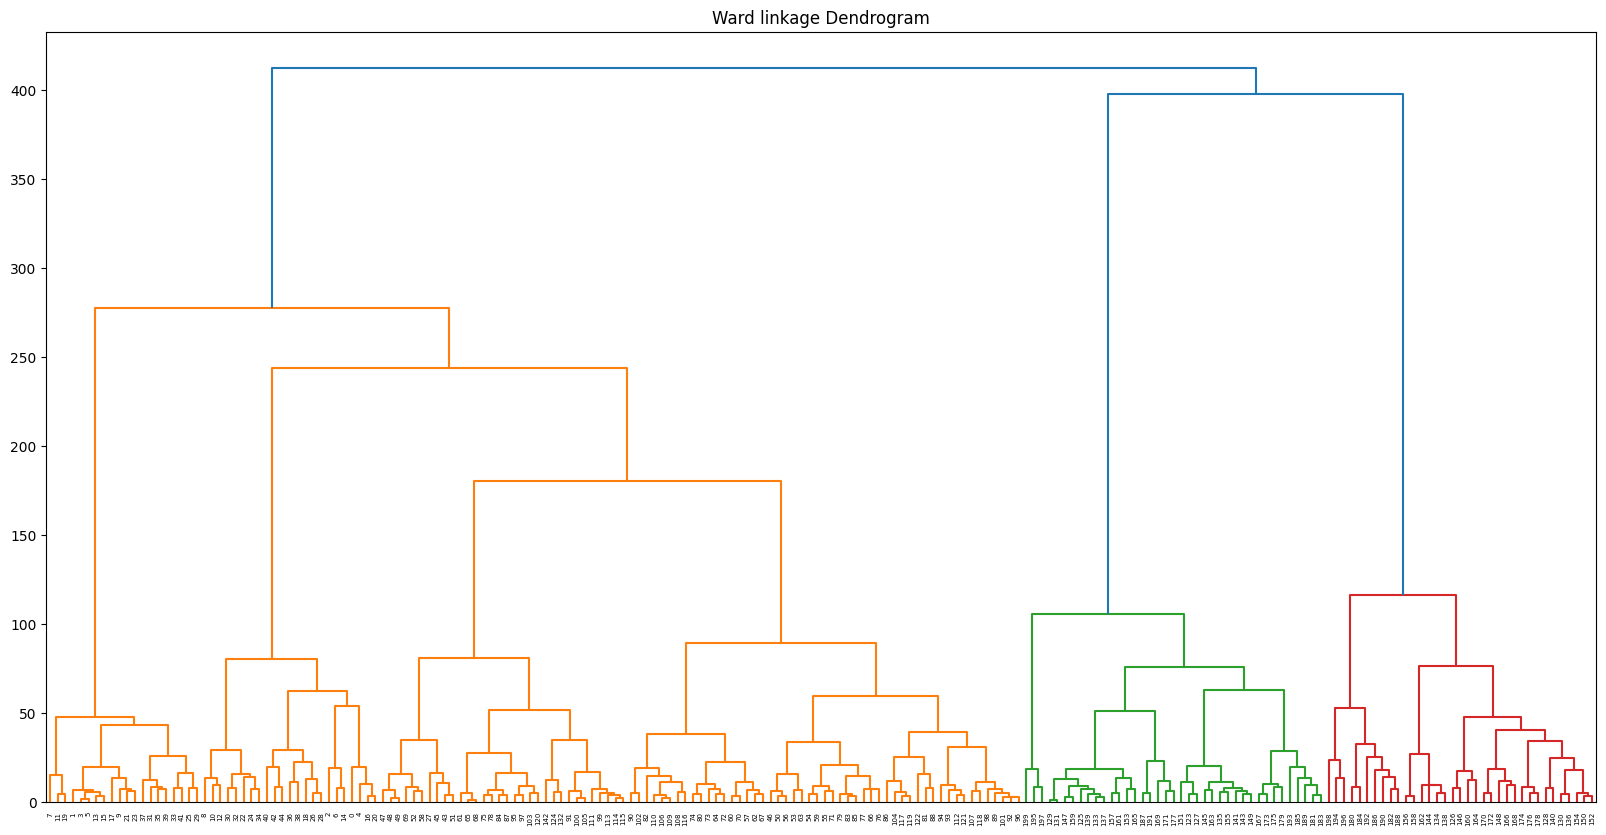

In [13]:
plt.figure(figsize=(20,10))
plt.title("Ward linkage Dendrogram")
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
data

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
...,...,...,...,...
195,35,120,79,False
196,45,126,28,False
197,32,126,74,True
198,32,137,18,True


In [16]:
# 클러스터링 수행
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single')
result = cluster.fit_predict(data)



In [17]:
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 0], dtype=int64)

In [18]:
data['result'] = result
data

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,result
0,19,15,39,True,0
1,21,15,81,True,0
2,20,16,6,False,0
3,23,16,77,False,0
4,31,17,40,False,0
...,...,...,...,...,...
195,35,120,79,False,0
196,45,126,28,False,2
197,32,126,74,True,0
198,32,137,18,True,1


In [19]:
data.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Male',
       'result'],
      dtype='object')

In [20]:
data.groupby('result')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Male']].mean()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
result,,,,
0,38.812183,59.538071,50.649746,0.441624
1,32.000000,137.000000,18.000000,1.000000
2,46.000000,123.000000,22.000000,0.000000


In [21]:
data[data['result'] == 0]

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,result
0,19,15,39,True,0
1,21,15,81,True,0
2,20,16,6,False,0
3,23,16,77,False,0
4,31,17,40,False,0
...,...,...,...,...,...
192,33,113,8,True,0
193,38,113,91,False,0
195,35,120,79,False,0
197,32,126,74,True,0


# 비계층적 군집 - 데이터 수가 많을 때 사용
* k-means(k평균 군집): 거리를 기반으로 군집을 형성, 이상치에 민감함. 


In [22]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/06%EA%B3%A0%EA%B0%9D%EC%9D%B4%ED%83%88%EC%98%88%EC%B8%A1.csv", encoding='cp949')
data.head()

,회원ID,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,...,기기보호서비스,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


하향식방법 vs 상향식 방법

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   회원ID        7043 non-null   object 
 1   성별          7043 non-null   object 
 2   고연령         7043 non-null   int64  
 3   배우자         7043 non-null   object 
 4   피부양자        7043 non-null   object 
 5   가입기간        7043 non-null   int64  
 6   전화서비스       7043 non-null   object 
 7   2회선이상       7043 non-null   object 
 8   인터넷서비스      7043 non-null   object 
 9   온라인보안       7043 non-null   object 
 10  온라인백업       7043 non-null   object 
 11  기기보호서비스     7043 non-null   object 
 12  기술지원        7043 non-null   object 
 13  스트리밍TV      7043 non-null   object 
 14  스트리밍Movies  7043 non-null   object 
 15  약정옵션        7043 non-null   object 
 16  온라인고지서      7043 non-null   object 
 17  지불수단        7043 non-null   object 
 18  월요금         7043 non-null   float64
 19  합산요금        7043 non-null  

In [24]:
data2 = data.copy()

In [25]:
data = data.drop('회원ID', axis=1)
data

,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,온라인백업,기기보호서비스,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [26]:
data['합산요금'] = data['합산요금'].apply(lambda x: x.replace(' ', '0') if x == ' ' else x)

In [27]:
data['합산요금'] = data['합산요금'].astype('float')

In [28]:
data = pd.get_dummies(data, drop_first=True)

In [29]:
from sklearn.cluster import KMeans

In [30]:
km = KMeans(n_clusters=5)
km.fit(data) 
result = km.labels_
result

array([2, 0, 2, ..., 2, 2, 4])

In [31]:
data['cluster'] = result

In [32]:
data.head()

,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,2회선이상_Yes,...,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check,이탈여부_Yes,cluster
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,True,False,True,False,False,2
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,0
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,True,False,False,True,True,2
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,0
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,2


In [33]:
data.columns

Index(['고연령', '가입기간', '월요금', '합산요금', '성별_Male', '배우자_Yes', '피부양자_Yes',
       '전화서비스_Yes', '2회선이상_No phone service', '2회선이상_Yes',
       '인터넷서비스_Fiber optic', '인터넷서비스_No', '온라인보안_No internet service',
       '온라인보안_Yes', '온라인백업_No internet service', '온라인백업_Yes',
       '기기보호서비스_No internet service', '기기보호서비스_Yes',
       '기술지원_No internet service', '기술지원_Yes', '스트리밍TV_No internet service',
       '스트리밍TV_Yes', '스트리밍Movies_No internet service', '스트리밍Movies_Yes',
       '약정옵션_One year', '약정옵션_Two year', '온라인고지서_Yes',
       '지불수단_Credit card (automatic)', '지불수단_Electronic check',
       '지불수단_Mailed check', '이탈여부_Yes', 'cluster'],
      dtype='object')

In [34]:
data[['이탈여부_Yes', 'cluster']]

,이탈여부_Yes,cluster
0,False,2
1,False,0
2,True,2
3,False,0
4,True,2
...,...,...
7038,False,0
7039,False,4
7040,False,2
7041,True,2


In [120]:
from sklearn.metrics import accuracy_score

In [133]:
print(accuracy_score(data['이탈여부_Yes'], data['cluster']))

0.27104926877750957


In [39]:
data[data['cluster'] == 0]

,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,2회선이상_Yes,...,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check,이탈여부_Yes,cluster
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,0
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,0
6,0,22,89.10,1949.40,True,False,True,True,False,True,...,False,False,False,False,True,True,False,False,False,0
16,0,52,20.65,1022.95,False,False,False,True,False,False,...,True,False,True,False,False,False,False,True,False,0
19,0,21,90.05,1862.90,False,False,False,True,False,False,...,False,True,False,False,True,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,0,51,20.65,1020.75,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,False,0
7025,0,18,95.05,1679.40,False,False,False,True,False,True,...,False,True,False,False,True,False,False,False,False,0
7035,0,19,78.70,1495.10,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,0
7037,0,72,21.15,1419.40,False,False,False,True,False,False,...,True,False,False,True,True,False,False,False,False,0


In [40]:
data[data['cluster'] == 1]

,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,2회선이상_Yes,...,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check,이탈여부_Yes,cluster
12,0,58,100.35,5681.10,True,True,False,True,False,True,...,False,True,True,False,False,True,False,False,False,1
13,0,49,103.70,5036.30,True,False,False,True,False,True,...,False,True,False,False,True,False,False,False,True,1
26,0,47,99.35,4749.15,True,True,True,True,False,True,...,False,True,False,False,True,False,True,False,True,1
41,0,70,69.20,4872.35,False,True,True,True,False,True,...,False,False,False,True,True,True,False,False,False,1
43,0,63,79.85,4861.45,False,False,False,True,False,True,...,False,False,False,True,True,True,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,1,50,88.05,4367.35,False,True,False,True,False,True,...,False,False,False,False,True,False,True,False,True,1
6995,0,57,89.55,5012.35,True,False,True,True,False,True,...,False,True,False,True,False,False,False,True,False,1
7007,1,72,63.10,4685.55,True,True,False,False,True,False,...,False,True,False,True,True,False,False,False,False,1
7012,0,62,84.95,5150.55,False,True,False,True,False,True,...,False,True,False,True,True,False,True,False,False,1


In [43]:
data[data['cluster'] == 2]

,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,2회선이상_Yes,...,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check,이탈여부_Yes,cluster
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,True,False,True,False,False,2
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,True,False,False,True,True,2
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,2
5,0,8,99.65,820.50,False,False,False,True,False,True,...,False,True,False,False,True,False,True,False,True,2
7,0,10,29.75,301.90,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7030,0,2,20.05,39.25,False,False,False,True,False,False,...,True,False,False,False,True,False,False,True,False,2
7032,1,1,75.75,75.75,True,False,False,True,False,True,...,False,False,False,False,True,False,True,False,True,2
7036,0,12,60.65,743.30,False,False,False,False,True,False,...,False,True,True,False,False,False,True,False,False,2
7040,0,11,29.60,346.45,False,True,True,False,True,False,...,False,False,False,False,True,False,True,False,False,2


In [124]:
data[data['cluster'] == 3]

,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,2회선이상_Yes,...,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check,이탈여부_Yes,cluster
15,0,69,113.25,7895.15,False,True,True,True,False,True,...,False,True,False,True,False,True,False,False,False,3
17,0,71,106.70,7382.25,True,False,True,True,False,True,...,False,True,False,True,False,False,False,False,False,3
28,0,72,90.25,6369.45,True,True,False,True,False,True,...,False,True,False,True,True,True,False,False,False,3
30,1,71,96.35,6766.95,False,True,False,True,False,True,...,False,False,False,True,True,True,False,False,False,3
35,0,72,99.90,7251.70,False,True,True,True,False,True,...,False,False,False,True,False,False,False,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0,72,104.95,7544.30,True,False,False,True,False,True,...,False,True,True,False,True,False,True,False,False,3
7023,1,63,103.50,6479.40,False,True,False,True,False,True,...,False,True,False,False,True,False,True,False,False,3
7034,0,67,102.95,6886.25,False,False,False,True,False,True,...,False,False,False,False,True,True,False,False,True,3
7039,0,72,103.20,7362.90,False,True,True,True,False,True,...,False,True,True,False,True,True,False,False,False,3


In [125]:
data[data['cluster'] == 4]

,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,2회선이상_Yes,...,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check,이탈여부_Yes,cluster
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,4
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,4
6,0,22,89.10,1949.40,True,False,True,True,False,True,...,False,False,False,False,True,True,False,False,False,4
16,0,52,20.65,1022.95,False,False,False,True,False,False,...,True,False,True,False,False,False,False,True,False,4
19,0,21,90.05,1862.90,False,False,False,True,False,False,...,False,True,False,False,True,False,True,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,0,51,20.65,1020.75,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,False,4
7025,0,18,95.05,1679.40,False,False,False,True,False,True,...,False,True,False,False,True,False,False,False,False,4
7035,0,19,78.70,1495.10,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,4
7037,0,72,21.15,1419.40,False,False,False,True,False,False,...,True,False,False,True,True,False,False,False,False,4


In [44]:
data.groupby('cluster')['이탈여부_Yes'].value_counts()

cluster  이탈여부_Yes
0        False       1289
         True         373
1        False        746
         True         141
2        False       1800
         True        1058
3        False        799
         True         221
4        False        540
         True          76
Name: count, dtype: int64

In [134]:
cluster1 = data[data['cluster'] == 0]
cluster1

,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,2회선이상_Yes,...,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check,이탈여부_Yes,cluster
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,True,False,True,False,False,0
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,True,False,False,True,True,0
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,0
5,0,8,99.65,820.50,False,False,False,True,False,True,...,False,True,False,False,True,False,True,False,True,0
7,0,10,29.75,301.90,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7030,0,2,20.05,39.25,False,False,False,True,False,False,...,True,False,False,False,True,False,False,True,False,0
7032,1,1,75.75,75.75,True,False,False,True,False,True,...,False,False,False,False,True,False,True,False,True,0
7036,0,12,60.65,743.30,False,False,False,False,True,False,...,False,True,True,False,False,False,True,False,False,0
7040,0,11,29.60,346.45,False,True,True,False,True,False,...,False,False,False,False,True,False,True,False,False,0


In [135]:
cluster1.describe()

,고연령,가입기간,월요금,합산요금,cluster
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.0
mean,0.121856,9.622033,47.914081,339.583776,0.0
std,0.327178,10.631374,26.340049,276.521693,0.0
min,0.000000,0.000000,18.250000,0.000000,0.0
25%,0.000000,2.000000,20.350000,83.750000,0.0
50%,0.000000,6.000000,45.350000,265.750000,0.0
75%,0.000000,12.000000,72.675000,550.475000,0.0
max,1.000000,52.000000,109.900000,943.100000,0.0


In [136]:
cluster1['고연령'].value_counts()

고연령
0    2479
1     344
Name: count, dtype: int64

In [137]:
cols = cluster1.columns

In [138]:
for col in cols:
    print(col)
    print(cluster1[col].value_counts())
    print()
    print()

고연령
고연령
0    2479
1     344
Name: count, dtype: int64


가입기간
가입기간
1     613
2     238
3     200
4     176
5     133
7     131
8     123
9     118
6     110
10    101
11     83
12     82
13     66
15     47
18     39
14     38
17     34
16     31
19     30
25     26
24     26
23     25
20     25
22     24
35     24
27     19
29     18
21     17
38     15
33     14
37     14
26     14
41     13
32     13
46     13
30     12
34     12
0      11
28     10
31     10
42     10
44     10
36     10
39      9
40      8
45      6
48      5
47      5
49      4
43      4
50      3
52      1
Name: count, dtype: int64


월요금
월요금
20.05    49
19.65    37
20.00    37
20.25    35
19.90    34
         ..
56.40     1
72.75     1
25.65     1
64.10     1
44.20     1
Name: count, Length: 895, dtype: int64


합산요금
합산요금
20.20     11
0.00      11
19.75      9
19.90      8
19.65      8
          ..
111.65     1
601.25     1
870.25     1
617.15     1
306.60     1
Name: count, Length: 2386, dtype: int64


성별_Male
성별

In [140]:
cols

Index(['고연령', '가입기간', '월요금', '합산요금', '성별_Male', '배우자_Yes', '피부양자_Yes',
       '전화서비스_Yes', '2회선이상_No phone service', '2회선이상_Yes',
       '인터넷서비스_Fiber optic', '인터넷서비스_No', '온라인보안_No internet service',
       '온라인보안_Yes', '온라인백업_No internet service', '온라인백업_Yes',
       '기기보호서비스_No internet service', '기기보호서비스_Yes',
       '기술지원_No internet service', '기술지원_Yes', '스트리밍TV_No internet service',
       '스트리밍TV_Yes', '스트리밍Movies_No internet service', '스트리밍Movies_Yes',
       '약정옵션_One year', '약정옵션_Two year', '온라인고지서_Yes',
       '지불수단_Credit card (automatic)', '지불수단_Electronic check',
       '지불수단_Mailed check', '이탈여부_Yes', 'cluster'],
      dtype='object')

In [142]:
cluster1.groupby('가입기간')['이탈여부_Yes'].mean()

가입기간
0     0.000000
1     0.619902
2     0.516807
3     0.470000
4     0.471591
5     0.481203
6     0.363636
7     0.389313
8     0.341463
9     0.389831
10    0.326733
11    0.228916
12    0.219512
13    0.151515
14    0.131579
15    0.234043
16    0.193548
17    0.117647
18    0.179487
19    0.066667
20    0.080000
21    0.058824
22    0.083333
23    0.000000
24    0.038462
25    0.115385
26    0.000000
27    0.052632
28    0.000000
29    0.111111
30    0.083333
31    0.100000
32    0.000000
33    0.071429
34    0.000000
35    0.000000
36    0.000000
37    0.000000
38    0.000000
39    0.000000
40    0.000000
41    0.000000
42    0.000000
43    0.000000
44    0.000000
45    0.166667
46    0.000000
47    0.000000
48    0.000000
49    0.000000
50    0.000000
52    0.000000
Name: 이탈여부_Yes, dtype: float64

In [144]:
cluster1.groupby('이탈여부_Yes')['합산요금'].mean()

이탈여부_Yes
False    375.830328
True     278.748719
Name: 합산요금, dtype: float64

# 군집의 최적 개수 정하기
* elbow method
* 실루엣 지수

군집분석의 응집도(얼마나 모여 있는지 판단하는 지표)
* inertia_값이 작을 수록 군집이 잘 형성됨

Elbow method: inertia_(응집도)를 출력하고 시각화 한 뒤 응집도의 감소폭이 급격한 변화가 사라지는 지점을 최적 군집의 수로 채택하는 것

In [145]:
print(km.inertia_)

1330911014.1273243


In [146]:
distance = []
for i in range(1, 21):
    km = KMeans(n_clusters = i)
    km.fit(data)
    distance.append(km.inertia_)
distance

[36194991035.823135,
 7935396133.169173,
 3706757564.6184874,
 2117701307.1047053,
 1330300566.1706748,
 916696254.9309897,
 672324287.6556315,
 523739754.28731394,
 430262571.5065174,
 330090377.8002438,
 270671274.1219237,
 236325095.49780077,
 197522098.74540028,
 169564895.8719245,
 149417705.46461827,
 136642866.0784797,
 124444783.2057024,
 106613702.43627594,
 96054109.0114392,
 87165291.13062648]

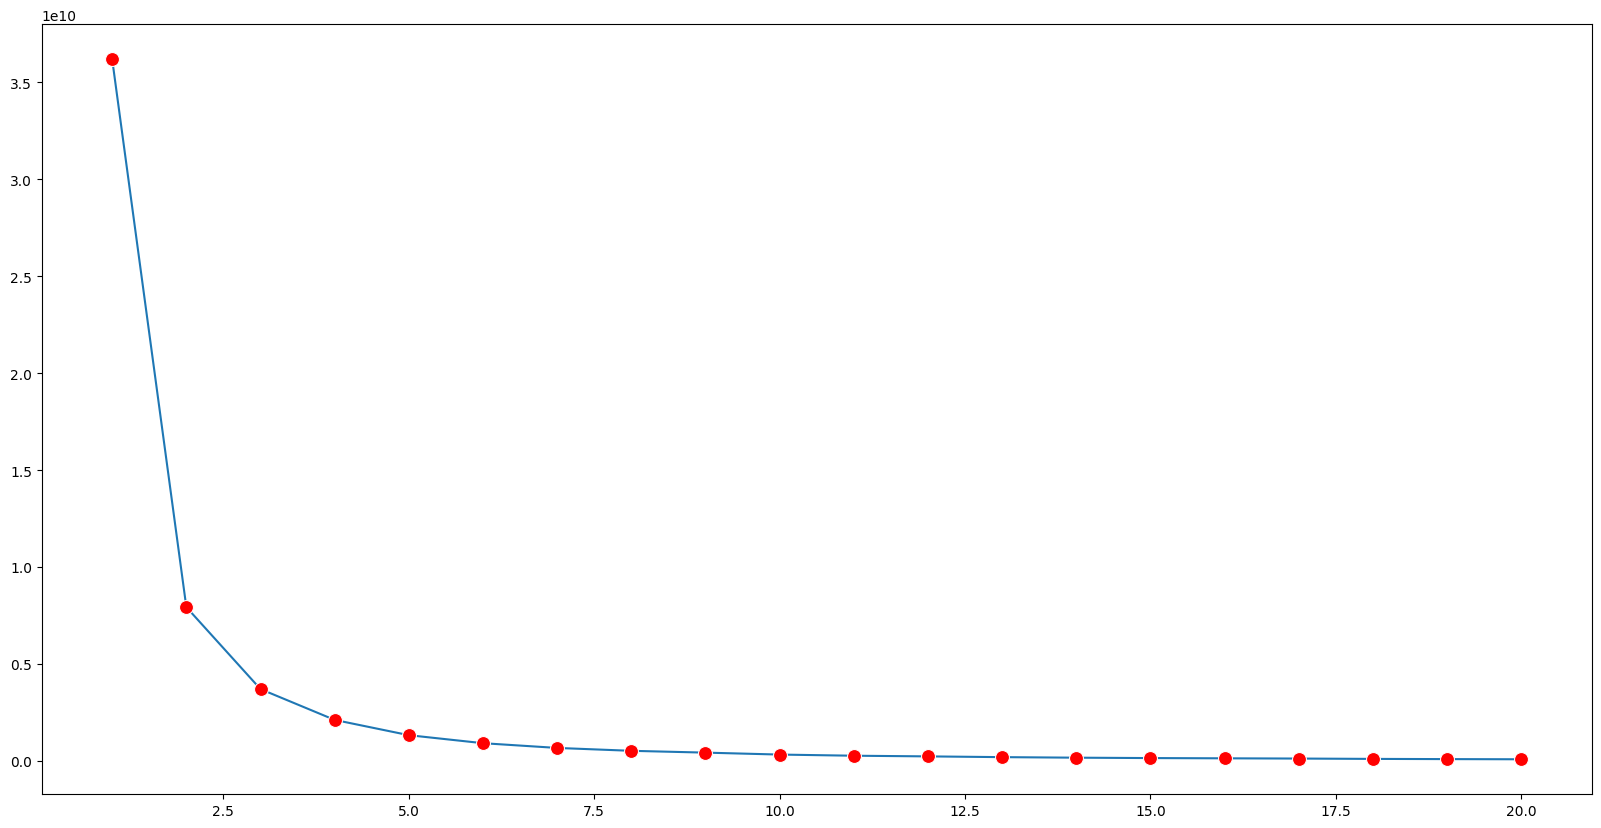

In [147]:
plt.figure(figsize=(20,10))
sns.lineplot(x= range(1, 21), y=distance, marker='o', markersize=10, markerfacecolor='red')
plt.show()

실루엣 지수를 출력해서 최적 군집 개수 구하기
* 실루엣 지수를 구하기 위해서는 최소 2개 이상의 군집이 필요

In [148]:
from sklearn.metrics import silhouette_score

In [150]:
silhouette_scores = []
for i in range(2, 21):
    km2 = KMeans(n_clusters= i)
    km2.fit(data)
    labels = km2.labels_
    silhouette_scores.append(silhouette_score(data, labels))
silhouette_scores   

[0.7031205274557472,
 0.6445548366423548,
 0.6021245709876771,
 0.5961005155698056,
 0.5906292446549642,
 0.5837748628454583,
 0.5721059602730956,
 0.5654192430075922,
 0.5551864627492824,
 0.5639802627825165,
 0.5521880374857816,
 0.5570201983365707,
 0.5507425057257536,
 0.5417094422756397,
 0.535096243504743,
 0.5401283200464239,
 0.5255858405812642,
 0.5372101514133047,
 0.5188210911555587]

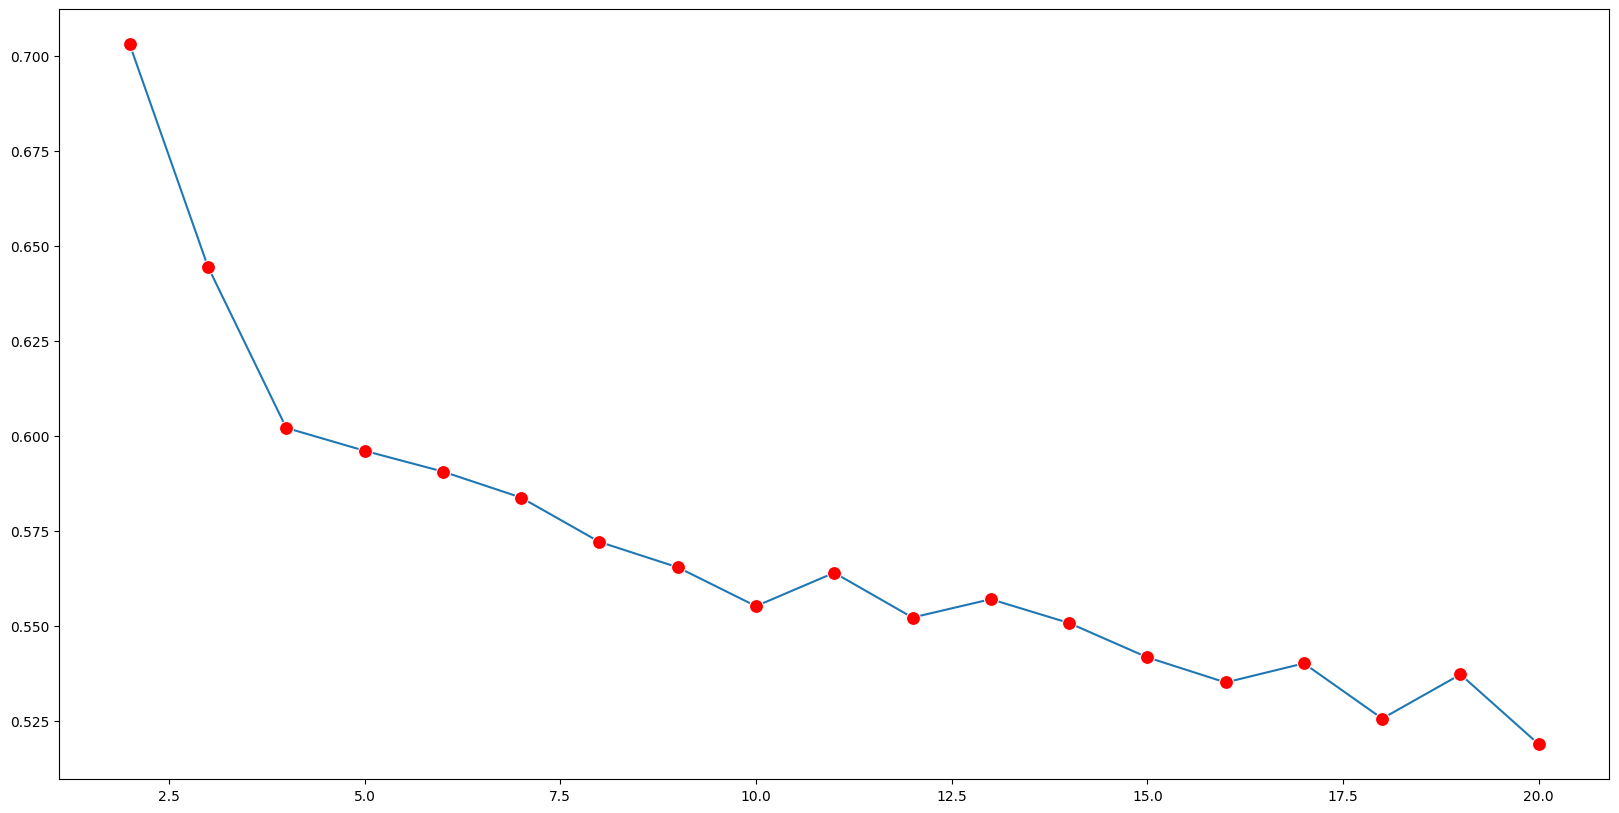

In [151]:
plt.figure(figsize=(20,10))
sns.lineplot(x= range(2, 21), y=silhouette_scores, marker='o', markersize=10, markerfacecolor='red')
plt.show()

In [152]:
data

,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,2회선이상_Yes,...,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check,이탈여부_Yes,cluster
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,True,False,True,False,False,0
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,4
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,True,False,False,True,True,0
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,4
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,True,True,True,True,False,True,...,False,True,True,False,True,False,False,True,False,4
7039,0,72,103.20,7362.90,False,True,True,True,False,True,...,False,True,True,False,True,True,False,False,False,3
7040,0,11,29.60,346.45,False,True,True,False,True,False,...,False,False,False,False,True,False,True,False,False,0
7041,1,4,74.40,306.60,True,True,False,True,False,True,...,False,False,False,False,True,False,False,True,True,0


# K-means 로 군집분석을 할 때 주의점
* k-means는 평균값을 이용하고 주로 유클리드 거리를 사용하기 때문에 이상치에 민감
* 군집분석하기 전에 데이터의 스케일을 미리 맞춰주는 것이 중요

In [153]:
data3 = data.drop('cluster', axis=1)
data3

,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,2회선이상_Yes,...,스트리밍TV_Yes,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check,이탈여부_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,True,True,True,True,False,True,...,True,False,True,True,False,True,False,False,True,False
7039,0,72,103.20,7362.90,False,True,True,True,False,True,...,True,False,True,True,False,True,True,False,False,False
7040,0,11,29.60,346.45,False,True,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
7041,1,4,74.40,306.60,True,True,False,True,False,True,...,False,False,False,False,False,True,False,False,True,True


<Axes: ylabel='합산요금'>

C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\5-29\min

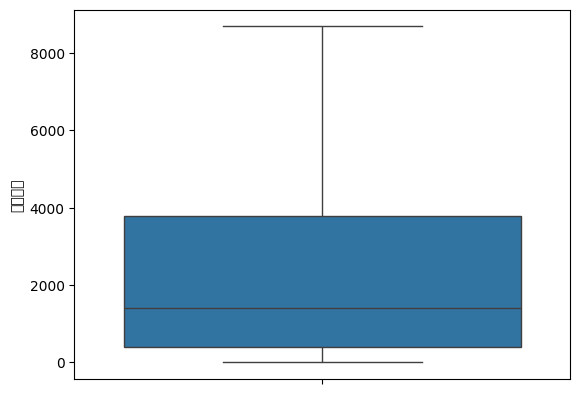

In [155]:
sns.boxplot(data3['합산요금'])

<Axes: ylabel='월요금'>

C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

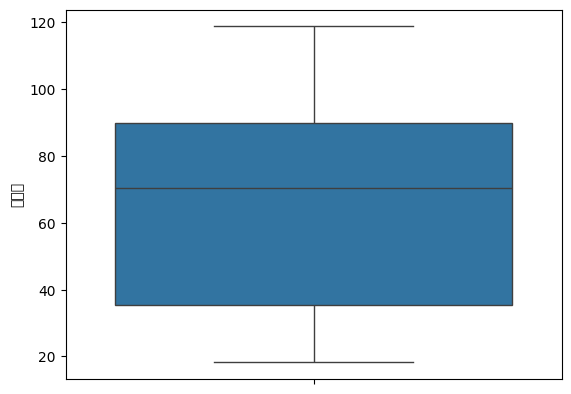

In [156]:
sns.boxplot(data3['월요금'])

In [159]:
X = data3.drop('이탈여부_Yes', axis=1)

In [160]:
X

,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,2회선이상_Yes,...,스트리밍TV_No internet service,스트리밍TV_Yes,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,True,True,True,True,False,True,...,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,False,True,True,True,False,True,...,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,False,True,True,False,True,False,...,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,True,True,False,True,False,True,...,False,False,False,False,False,False,True,False,False,True


In [157]:
from sklearn.preprocessing import MinMaxScaler

In [161]:
mm = MinMaxScaler()
scaled_X = mm.fit_transform(X)
scaled_X

array([[0.        , 0.01388889, 0.11542289, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.47222222, 0.38507463, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.02777778, 0.35422886, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.15277778, 0.11293532, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.05555556, 0.55870647, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.91666667, 0.86965174, ..., 0.        , 0.        ,
        0.        ]])

In [162]:
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
scaled_X

,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,2회선이상_Yes,...,스트리밍TV_No internet service,스트리밍TV_Yes,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check
0,0.0,0.013889,0.115423,0.003437,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.217564,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.012453,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.211951,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.017462,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.333333,0.662189,0.229194,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7039,0.0,1.000000,0.845274,0.847792,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7040,0.0,0.152778,0.112935,0.039892,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7041,1.0,0.055556,0.558706,0.035303,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [165]:
km4 = KMeans(n_clusters=2)
km4.fit(scaled_X)
result4 = km4.labels_

In [166]:
result4

array([1, 1, 1, ..., 1, 1, 1])

In [167]:
scaled_X['cluster'] = result4
scaled_X

,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,2회선이상_Yes,...,스트리밍TV_Yes,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check,cluster
0,0.0,0.013889,0.115423,0.003437,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
1,0.0,0.472222,0.385075,0.217564,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
2,0.0,0.027778,0.354229,0.012453,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,0.0,0.625000,0.239303,0.211951,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.027778,0.521891,0.017462,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.333333,0.662189,0.229194,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1
7039,0.0,1.000000,0.845274,0.847792,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1
7040,0.0,0.152778,0.112935,0.039892,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
7041,1.0,0.055556,0.558706,0.035303,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1


In [170]:
print(accuracy_score(data3['이탈여부_Yes'], result4))

0.4499503052676416


In [183]:
distance2 =[]
silhouette_scores2 = []
for i in range(2,21):
    km4 = KMeans(n_clusters=i, random_state=77)
    km4.fit(scaled_X)
#     result4 = km4.labels_
    distance2.append(km4.inertia_)
    silhouette_scores2.append(silhouette_score(scaled_X, labels))
distance2

[27290.8789579101,
 24175.373298724793,
 22523.637339941713,
 21926.157808473414,
 20982.937145125492,
 20363.119074509385,
 19728.81350601311,
 19453.7191242569,
 19229.113042732584,
 18692.768203401138,
 18338.034205145028,
 18041.726193032315,
 17784.858860153552,
 17522.39846563599,
 17182.623241104942,
 17118.19597200134,
 16834.683503771586,
 16682.20063004887,
 16537.30538590781]

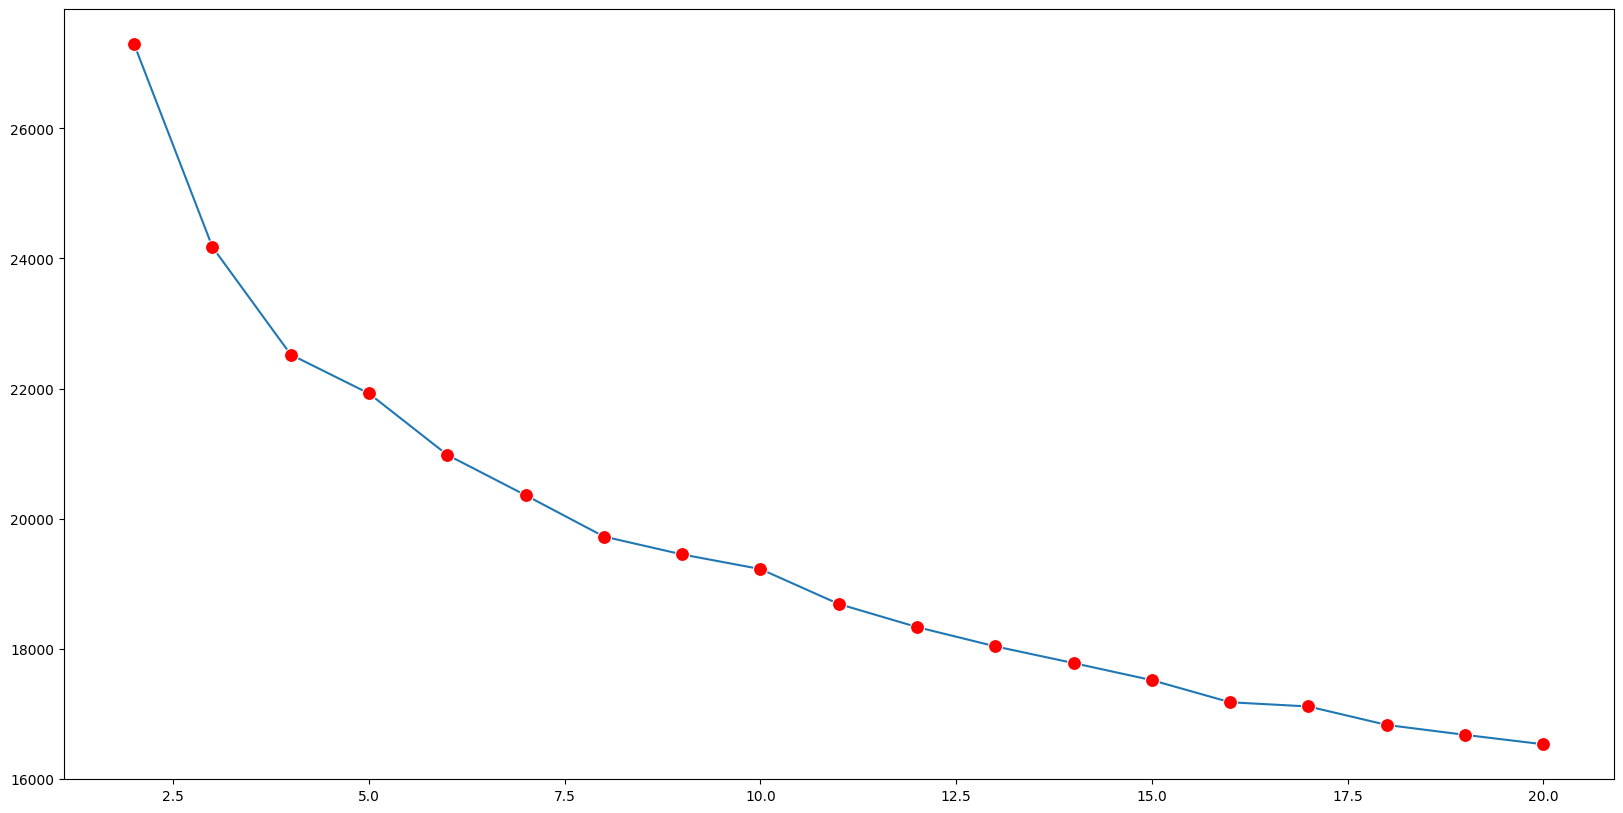

In [184]:
plt.figure(figsize=(20,10))
sns.lineplot(x= range(2, 21), y=distance2, marker='o', markersize=10, markerfacecolor='red')
plt.show()

In [185]:
silhouette_scores2 = []
for i in range(2,21):
    km4 = KMeans(n_clusters=i, random_state=77)
    km4.fit(scaled_X)
    labels = km4.labels_
    silhouette_scores2.append(silhouette_score(scaled_X, labels))
silhouette_scores2

[0.33537259240562683,
 0.20486830809453152,
 0.1874462441457756,
 0.1239388923411754,
 0.11212497473696784,
 0.1056040166032437,
 0.10595861576122348,
 0.10333168786143268,
 0.10252590438776678,
 0.09813459043840268,
 0.09554011304360674,
 0.09478571845039245,
 0.09389124236738705,
 0.09214133551555398,
 0.0993003464916869,
 0.09370838650931634,
 0.09641347329665709,
 0.09072021196392067,
 0.0912310451093464]

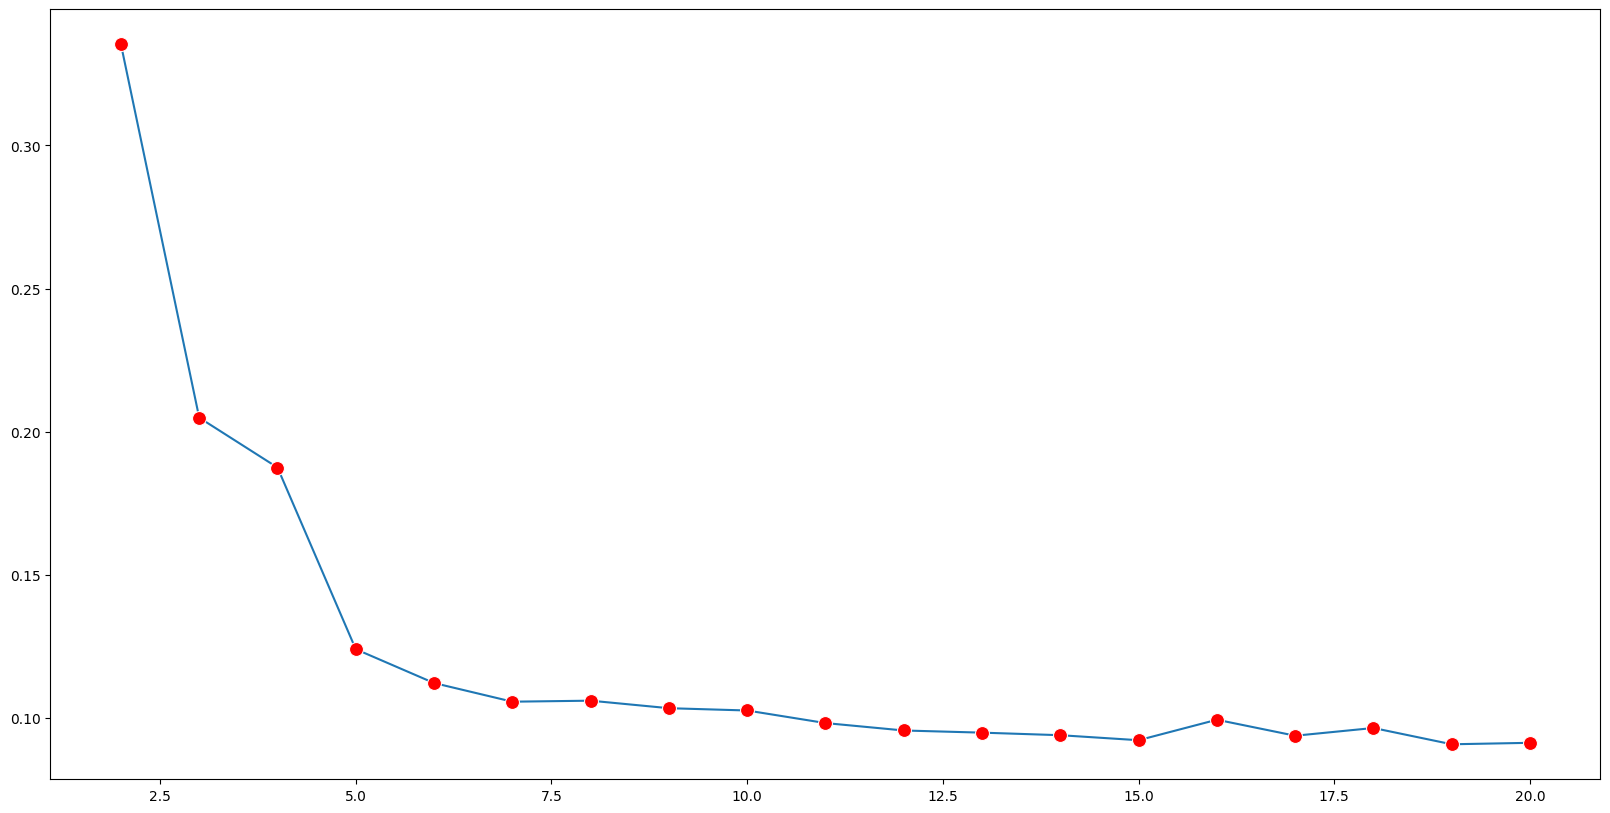

In [186]:
plt.figure(figsize=(20,10))
sns.lineplot(x= range(2, 21), y=silhouette_scores2, marker='o', markersize=10, markerfacecolor='red')
plt.show()

DBSCAN: 밀도기반 군집분석 알고리즘

In [187]:
from sklearn.cluster import DBSCAN

In [189]:
data3['cluster'] = labels

In [191]:
scaled_X

,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,2회선이상_Yes,...,스트리밍TV_Yes,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check,cluster
0,0.0,0.013889,0.115423,0.003437,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
1,0.0,0.472222,0.385075,0.217564,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
2,0.0,0.027778,0.354229,0.012453,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,0.0,0.625000,0.239303,0.211951,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.027778,0.521891,0.017462,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.333333,0.662189,0.229194,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1
7039,0.0,1.000000,0.845274,0.847792,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1
7040,0.0,0.152778,0.112935,0.039892,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
7041,1.0,0.055556,0.558706,0.035303,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1


In [190]:
data3

,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,2회선이상_Yes,...,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check,이탈여부_Yes,cluster
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,True,False,True,False,False,17
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,7
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,True,False,False,True,True,16
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,10
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,True,True,True,True,False,True,...,False,True,True,False,True,False,False,True,False,12
7039,0,72,103.20,7362.90,False,True,True,True,False,True,...,False,True,True,False,True,True,False,False,False,2
7040,0,11,29.60,346.45,False,True,True,False,True,False,...,False,False,False,False,True,False,True,False,False,17
7041,1,4,74.40,306.60,True,True,False,True,False,True,...,False,False,False,False,True,False,False,True,True,5


In [192]:
final_df = scaled_X.copy()
final_df

,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,2회선이상_Yes,...,스트리밍TV_Yes,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check,cluster
0,0.0,0.013889,0.115423,0.003437,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
1,0.0,0.472222,0.385075,0.217564,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
2,0.0,0.027778,0.354229,0.012453,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,0.0,0.625000,0.239303,0.211951,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.027778,0.521891,0.017462,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.333333,0.662189,0.229194,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1
7039,0.0,1.000000,0.845274,0.847792,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1
7040,0.0,0.152778,0.112935,0.039892,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
7041,1.0,0.055556,0.558706,0.035303,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1


In [193]:
scaled_X = scaled_X.drop('cluster', axis=1)
scaled_X

,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,2회선이상_Yes,...,스트리밍TV_No internet service,스트리밍TV_Yes,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check
0,0.0,0.013889,0.115423,0.003437,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.217564,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.012453,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.211951,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.017462,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.333333,0.662189,0.229194,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7039,0.0,1.000000,0.845274,0.847792,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7040,0.0,0.152778,0.112935,0.039892,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7041,1.0,0.055556,0.558706,0.035303,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [209]:
model = DBSCAN(eps=2, min_samples=5)
DB_result = model.fit_predict(scaled_X)
DB_result

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [210]:
final_df['db_cluster'] = DB_result

In [211]:
final_df['db_cluster'].value_counts()

db_cluster
0    5517
1    1526
Name: count, dtype: int64

In [213]:
final_df[['cluster','db_cluster']].head(60)

,cluster,db_cluster
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [214]:
final_df['db_cluster'] = final_df['db_cluster'].apply(lambda x: 1 if x == 0 else 0)

In [215]:
final_df[['cluster','db_cluster']].head(60)

,cluster,db_cluster
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [216]:
accuracy_score(final_df['cluster'], final_df['db_cluster'])

1.0